In [1]:
import numpy as np
import tensorflow as tf
from PIL import Image
from skimage import color

In [2]:
import os

In [3]:
X_loaded = np.load("preprocessed_data/intel-dataset/inputs.npy")
y_loaded = np.load("preprocessed_data/intel-dataset/labels.npy")

In [4]:
X_loaded.shape

(24267, 150, 150)

In [5]:
y_loaded.shape

(24267, 150, 150, 3)

In [14]:
X_small = X_loaded[0,:,:]
y_small = y_loaded[0,:,:,:]

In [15]:
X_small.shape

(150, 150)

In [16]:
y_small.shape

(150, 150, 3)

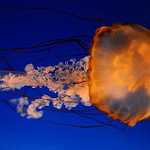

In [17]:
y_small_rgb = (color.lab2rgb(y_small) * 255).astype(np.uint8)
pli_img = Image.fromarray(y_small_rgb)
display(pli_img.convert('RGB') if pli_img.mode != 'RGB' else pli_img)

In [18]:
X_small = tf.expand_dims(X_small, 0)
X_small = tf.expand_dims(X_small, 3)

In [19]:
X_small.shape

TensorShape([1, 150, 150, 1])

In [11]:
layer = tf.keras.layers.Flatten()
x_flattened = layer(X_small)
x_flattened.shape

TensorShape([1, 22500])

In [31]:
def defined_loss(pred, truth):
  print("loss start")
  pred = tf.reshape(pred, (-1, 150, 150, 2))
  # truth = truth[:,:,:,1:]
  print(tf.shape(truth))
  # pred = tf.reshape(pred, [-1, 150, 150, 3])
  # pred = tf.reshape(pred, [-1, 20, 20, 3])
  loss = tf.reduce_mean(tf.math.square(truth - pred))
  print("Return loss")
  return loss

In [32]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(150,150,1)),
    # tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(22500 * 2)
    tf.keras.layers.Conv2D(filters=2, kernel_size=3, strides=1, padding="same", activation="relu"),
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss=defined_loss)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 2)       20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [15]:
y_small = tf.expand_dims(y_small, 0)

In [16]:
y_small.shape

TensorShape([1, 150, 150, 3])

In [17]:
X_small.shape

TensorShape([1, 150, 150])

In [33]:
print(X_small.shape)
print(model(X_small).shape)
y_small.shape

(1, 150, 150, 1)
(1, 150, 150, 2)


TensorShape([1, 150, 150, 3])

In [24]:
y_small = tf.expand_dims(y_small, 0)

In [25]:
y_small.shape

TensorShape([1, 150, 150, 3])

In [35]:
y_small = y_small[:,:,:,1:]

In [36]:
model.fit(X_small, y_small)

loss start
Tensor("defined_loss/Shape:0", shape=(4,), dtype=int32)
Return loss
1/1 [==============================] - 0s 326ms/step - loss: 1679.6316
